#### 复杂散点图

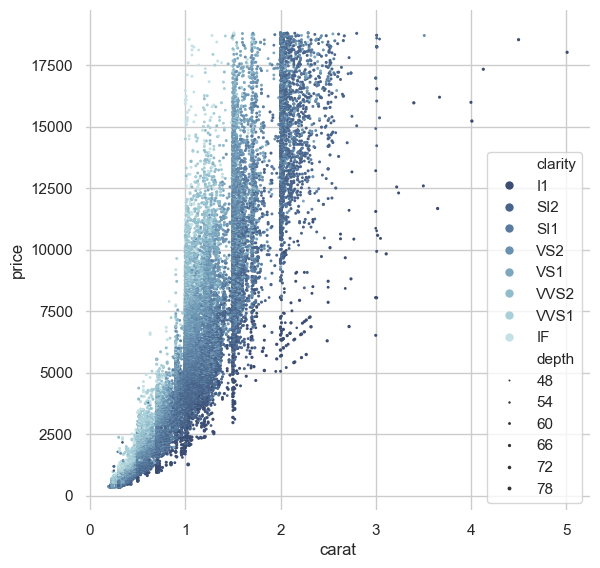

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)
plt.show()

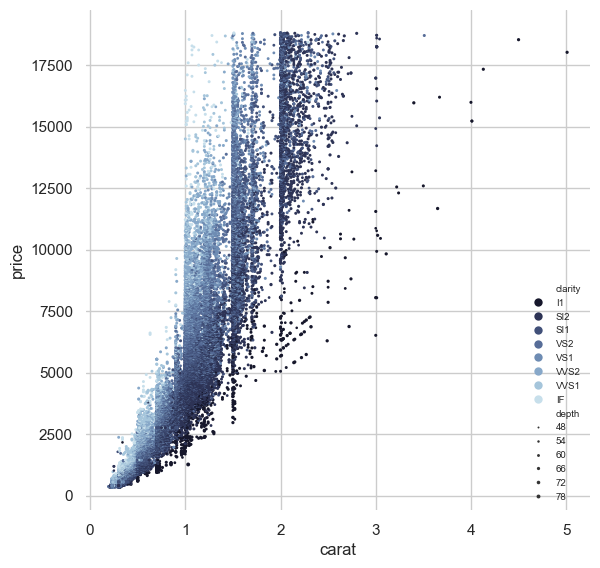

In [2]:
diamonds = pd.read_csv("diamonds.csv")

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.15,d=.1_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

plt.legend(loc = 'lower right',frameon = False,fontsize = 7)
plt.show()

#### 小提琴图

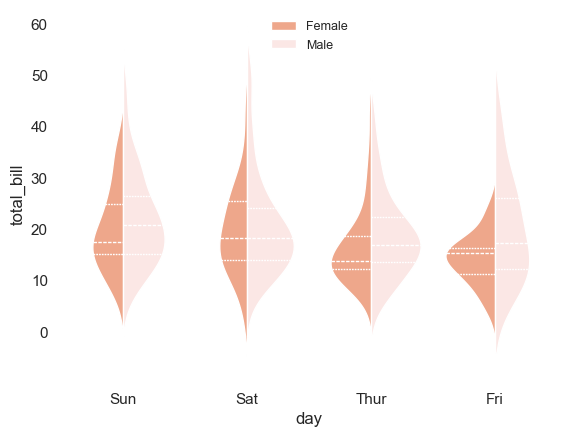

In [3]:
sns.set_theme(style="white")

tips = pd.read_csv("tips.csv")

sns.violinplot(data=tips, x="day", y="total_bill", hue="sex",
               split=True, inner="quart", linewidth=1,
               palette={"Female": "lightsalmon", "Male": "mistyrose"},
               linecolor = 'w')
sns.despine(left = True,bottom = True)

plt.legend(loc = 'upper center',frameon = False,fontsize = 9)
plt.show()

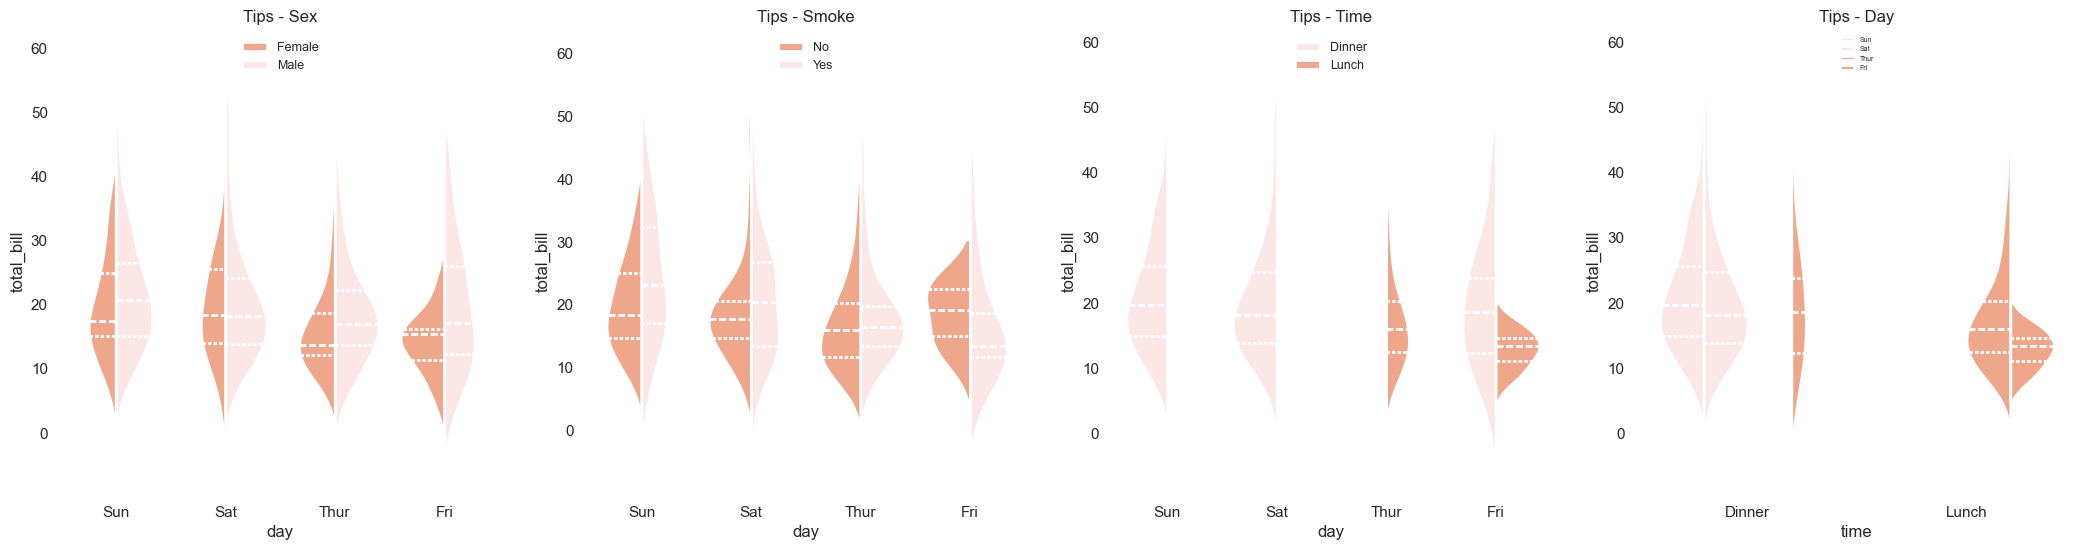

In [4]:
fig,axes = plt.subplots(1,4,figsize = (26,6))
sns.set_theme(style="white")
tips = pd.read_csv("tips.csv")

sns.violinplot(data=tips, x="day", y="total_bill", hue="sex",
               split=True, inner="quart", linewidth=2,linecolor = 'w',
               palette={"Female": "lightsalmon", "Male": "mistyrose"},
               ax = axes[0])
sns.despine(left = True,bottom = True)
axes[0].set_title('Tips - Sex')
axes[0].legend(loc = 'upper center',frameon = False,fontsize = 9)

sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=2,linecolor = 'w',
               palette={"No": "lightsalmon", "Yes": "mistyrose"},
               ax = axes[1])
sns.despine(left = True,bottom = True)
axes[1].set_title('Tips - Smoke')
axes[1].legend(loc = 'upper center',frameon = False,fontsize = 9)

sns.violinplot(data=tips, x="day", y="total_bill", hue="time",
               split=True, inner="quart", linewidth=2,linecolor = 'w',
               palette={"Lunch": "lightsalmon", "Dinner": "mistyrose"},
               ax = axes[2])
sns.despine(left = True,bottom = True)
axes[2].set_title('Tips - Time')
axes[2].legend(loc = 'upper center',frameon = False,fontsize = 9)

sns.violinplot(data=tips, x="time", y="total_bill", hue="day",
               split=True, inner="quart", linewidth=2,linecolor = 'w',
               palette={"Thur": "lightsalmon",
                        "Fri": "lightsalmon",
                        "Sat": "mistyrose",
                        "Sun": "mistyrose"},
               ax = axes[3])
sns.despine(left = True,bottom = True)
axes[3].set_title('Tips - Day')
axes[3].legend(loc = 'upper center',frameon = False,fontsize = 5)

plt.show()

#### 散点热力图

##### 多层级索引

我们通过 pd.MultiIndex.from_product() 函数创建了一个包含两个级别的层级索引。然后，我们使用这个层级索引创建了一个 DataFrame，其中每个数据点由两个层级 'Group' 和 'Number' 组成，分别用于标识数据。层级索引的优点在于，它可以更好地表示和处理这类多维数据。

在 Pandas 中，层级索引可以在 DataFrame 和 Series 上使用。创建层级索引通常可以通过将多个索引标签传递给 pd.MultiIndex.from_tuples()、pd.MultiIndex.from_arrays()、pd.MultiIndex.from_product() 等函数，也可以通过对已有的 DataFrame 使用 set_index() 方法来设置层级索引。

In [6]:
import pandas as pd

# 创建一个包含层级索引的DataFrame
index = pd.MultiIndex.from_product([['A','B'],[1,2]],names=['Group','Number'])
data = pd.DataFrame({'Value':[10,20,30,40]},index = index)
data

Value
Group Number       
A     1          10
      2          20
B     1          30
      2          40

get_level_values 是 DataFrame 和 MultiIndex（多重索引）对象的一个方法，用于获取 MultiIndex 中指定级别的值。

当 DataFrame 使用 MultiIndex（层次化索引）作为索引时，数据可以按照多个层级进行分组和组织

get_level_values 方法可以从 MultiIndex 中提取指定层级的索引值，从而方便我们对数据进行筛选、分组和聚合操作。

In [7]:
import pandas as pd

# 创建一个包含多重索引的DataFrame
data = {'A': [1, 2, 3, 4],
        'B': [5, 6, 7, 8]}
index = pd.MultiIndex.from_tuples([('X', 1), ('X', 2), ('Y', 1), ('Y', 2)], names=['Group', 'Number'])
df = pd.DataFrame(data, index=index)

# 获取 MultiIndex 中的第一级索引值
level_values = df.index.get_level_values(0)

print(df)
print('\n')
print(f"First Level Index Values:\n{level_values}")

              A  B
Group Number      
X     1       1  5
      2       2  6
Y     1       3  7
      2       4  8


First Level Index Values:
Index(['X', 'X', 'Y', 'Y'], dtype='object', name='Group')


##### 绘制散点热力图

In [8]:
# Load the brain networks dataset, select subset, and collapse the multi-index

In [9]:
df = pd.read_csv('brain_networks.csv')
df.head(5)

,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
1,hemi,lh,rh,lh,rh,lh,rh,lh,rh,lh,...,rh,lh,rh,lh,rh,lh,rh,lh,rh,lh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418


In [10]:
# 获取 MultiIndex 中的第一级索引值
level_values = df.index.get_level_values(0)
print(f"First Level Index Values:\n{level_values}")

First Level Index Values:
RangeIndex(start=0, stop=923, step=1)


In [11]:
# 通过指定 header=[0, 1, 2] 参数，我们将数据集的前三行用作 MultiIndex 中的层级索引。
# 并通过 index_col=0 参数将第一列作为 DataFrame 的索引。
df = pd.read_csv('brain_networks.csv',header = [0,1,2],index_col = 0)
df.head(5)

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

In [12]:
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]

在 Python 编程里，“columns” 一般指类似于表格结构（如数据框或数据库中的表）中的列。“df.columns” 是 Pandas 库中用于操作数据框（DataFrame）的一个属性，它可以输出数据框现有的列名，方便后续复制使用。

In [34]:

df.columns

Index(['1-1-lh', '1-1-rh', '5-1-lh', '5-1-rh', '6-1-lh', '6-1-rh', '6-2-lh',
       '6-2-rh', '7-1-lh', '7-1-rh', '7-2-lh', '7-2-rh', '7-3-lh', '7-3-rh',
       '8-1-lh', '8-1-rh', '8-2-lh', '8-2-rh', '8-3-lh', '8-3-rh', '12-1-lh',
       '12-1-rh', '12-2-lh', '12-2-rh', '12-3-lh', '13-1-lh', '13-1-rh',
       '13-2-lh', '13-2-rh', '13-3-rh', '13-4-rh', '17-1-lh', '17-1-rh',
       '17-2-lh', '17-2-rh', '17-3-lh', '17-3-rh', '17-4-lh'],
      dtype='object')

In [14]:
df.columns.get_level_values('network')

Index(['1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '6', '6',
       '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '9', '9',
       '10', '10', '11', '11', '12', '12', '12', '12', '12', '13', '13', '13',
       '13', '13', '13', '14', '14', '15', '15', '16', '16', '16', '16', '16',
       '16', '16', '16', '17', '17', '17', '17', '17', '17', '17'],
      dtype='object', name='network')

In [15]:
df.columns.get_level_values('network').astype(int)

Index([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  9,  9, 10, 10, 11, 11, 12, 12, 12, 12,
       12, 13, 13, 13, 13, 13, 13, 14, 14, 15, 15, 16, 16, 16, 16, 16, 16, 16,
       16, 17, 17, 17, 17, 17, 17, 17],
      dtype='int64', name='network')

In [17]:
used_columns = (df.columns.get_level_values("network").astype(int).isin(used_networks))

In [18]:
used_columns

array([ True,  True, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True])

In [19]:
df = df.loc[:, used_columns]
df

network           1                     5                     6             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036 -35.898861  -1.889181   5.898688 -43.692322   
1         55.547253  43.690075  19.568010  15.902983 -23.231823 -10.745867   
2         60.997768  63.438793  19.247454  37.209419   2.392153  16.509109   
3         18.514868  12.657158  32.896915  11.199619 -14.665752   2.073715   
4         -2.527392 -63.104668  18.396759   3.219077 -41.856911 -24.690414   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219   0.017912 -25.305094 -75.461159 -70.289261   
916      -33.554138 -38.605621 -32.935612 -21.783203 -16.198238 -34.893780   
917      -78.539566 -74.197189 -32.800556 -37.021500   2.098941 -18.581594   
918     -103.235825 -98.744286 -14.330512 -17.224781  -3.007454 -42.672840   
919      -36.288868 -10.762070  26.558777  21.377319   9.652065  12.693388   

network                                7             ...         13  \
node             2                     1             ...          2   
hemi            lh         rh         lh         rh  ...         rh   
0       -47.664265  12.284122   1.566538 -13.042585  ...  14.738475   
1        10.269546  31.275831 -26.309488 -18.077026  ...  23.792282   
2        -5.314236   2.372976  -7.342168 -24.550989  ...   8.968520   
3        32.634335  45.825409 -47.632999  -6.580215  ...  19.627728   
4       -33.975418 -24.149668  -6.315651 -29.344135  ...  55.853088   
..             ...        ...        ...        ...  ...        ...   
915     -13.119029  -5.194376 -56.022263 -24.290606  ... -19.436220   
916      16.504656  13.005379  26.230785   4.764211  ...  16.711153   
917      11.386637   3.676295  52.871113  -3.970096  ...  45.261150   
918       1.581095 -38.023777  37.736561   4.872248  ...  33.483253   
919     -24.773617 -62.247086  -4.883728 -49.077343  ...  -8.466401   

network                               17                                   \
node             3          4          1                     2              
hemi            rh         rh         lh         rh         lh         rh   
0       -16.853010 -34.217819 -21.734550   1.028253   7.791784  68.903725   
1         8.927007 -19.732401 -13.035799  46.381824 -15.752450  31.000332   
2         1.413584  -4.955075  26.033442  34.212200   1.326110 -22.580757   
3        49.208748   1.661293  55.297466   4.255006  -2.420144  12.098393   
4        46.737320   4.586625  43.067562  52.219875  28.232882 -11.719750   
..             ...        ...        ...        ...        ...        ...   
915      15.894722  22.195951  76.179489  51.934669  -6.614513  -6.690762   
916      17.339653  13.682954  50.962399  13.696922  63.503616  57.401176   
917      37.007389  29.753304  43.800747   8.144480  47.281460  70.499649   
918      37.434860 -14.403917  46.674419  40.954796   0.877180  37.577152   
919      23.855883  48.888733 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 38 columns]

In [20]:
df.columns = df.columns.map("-".join)
df.columns

Index(['1-1-lh', '1-1-rh', '5-1-lh', '5-1-rh', '6-1-lh', '6-1-rh', '6-2-lh',
       '6-2-rh', '7-1-lh', '7-1-rh', '7-2-lh', '7-2-rh', '7-3-lh', '7-3-rh',
       '8-1-lh', '8-1-rh', '8-2-lh', '8-2-rh', '8-3-lh', '8-3-rh', '12-1-lh',
       '12-1-rh', '12-2-lh', '12-2-rh', '12-3-lh', '13-1-lh', '13-1-rh',
       '13-2-lh', '13-2-rh', '13-3-rh', '13-4-rh', '17-1-lh', '17-1-rh',
       '17-2-lh', '17-2-rh', '17-3-lh', '17-3-rh', '17-4-lh'],
      dtype='object')

In [31]:
df.head(5)
# 以上,数据处理的目的是将前面三个数据结构整合成一行

,1-1-lh,1-1-rh,5-1-lh,5-1-rh,6-1-lh,6-1-rh,6-2-lh,6-2-rh,7-1-lh,7-1-rh,...,13-2-rh,13-3-rh,13-4-rh,17-1-lh,17-1-rh,17-2-lh,17-2-rh,17-3-lh,17-3-rh,17-4-lh
0,56.055744,92.031036,-35.898861,-1.889181,5.898688,-43.692322,-47.664265,12.284122,1.566538,-13.042585,...,14.738475,-16.853010,-34.217819,-21.734550,1.028253,7.791784,68.903725,-10.520872,120.490463,-39.686432
1,55.547253,43.690075,19.568010,15.902983,-23.231823,-10.745867,10.269546,31.275831,-26.309488,-18.077026,...,23.792282,8.927007,-19.732401,-13.035799,46.381824,-15.752450,31.000332,-39.607521,24.764011,-36.771008
2,60.997768,63.438793,19.247454,37.209419,2.392153,16.509109,-5.314236,2.372976,-7.342168,-24.550989,...,8.968520,1.413584,-4.955075,26.033442,34.212200,1.326110,-22.580757,12.985169,-75.027451,6.434262
3,18.514868,12.657158,32.896915,11.199619,-14.665752,2.073715,32.634335,45.825409,-47.632999,-6.580215,...,19.627728,49.208748,1.661293,55.297466,4.255006,-2.420144,12.098393,-15.819172,-37.361431,-4.650954
4,-2.527392,-63.104668,18.396759,3.219077,-41.856911,-24.690414,-33.975418,-24.149668,-6.315651,-29.344135,...,55.853088,46.737320,4.586625,43.067562,52.219875,28.232882,-11.719750,5.453649,5.169828,87.809135


In [21]:
# Compute a correlation matrix and convert to long-form

In [22]:
df.corr()

,1-1-lh,1-1-rh,5-1-lh,5-1-rh,6-1-lh,6-1-rh,6-2-lh,6-2-rh,7-1-lh,7-1-rh,...,13-2-rh,13-3-rh,13-4-rh,17-1-lh,17-1-rh,17-2-lh,17-2-rh,17-3-lh,17-3-rh,17-4-lh
1-1-lh,1.000000,0.881516,0.431619,0.418708,-0.084634,-0.031461,-0.077035,-0.037950,-0.333648,-0.288166,...,-0.327967,-0.327186,-0.103326,-0.099781,-0.161649,-0.206379,-0.212601,-0.142770,-0.204326,-0.219283
1-1-rh,0.881516,1.000000,0.431953,0.519916,-0.035720,0.036814,-0.049187,-0.001363,-0.284145,-0.247166,...,-0.405959,-0.396053,-0.152463,-0.212964,-0.262915,-0.273370,-0.266456,-0.174222,-0.223572,-0.273626
5-1-lh,0.431619,0.431953,1.000000,0.822897,0.283077,0.367033,0.201292,0.250114,-0.217666,-0.082428,...,-0.287812,-0.283475,-0.040606,-0.175772,-0.237626,-0.359879,-0.299152,-0.245179,-0.302654,-0.282767
5-1-rh,0.418708,0.519916,0.822897,1.000000,0.228128,0.436738,0.133841,0.271610,-0.245344,-0.078763,...,-0.326339,-0.335078,-0.082185,-0.198837,-0.244067,-0.394522,-0.295150,-0.303354,-0.277378,-0.279381
6-1-lh,-0.084634,-0.035720,0.283077,0.228128,1.000000,0.693108,0.290786,0.309868,0.227034,0.245031,...,-0.175107,-0.147251,-0.158301,-0.250793,-0.277102,-0.083844,-0.073452,-0.083266,-0.015720,-0.144766
6-1-rh,-0.031461,0.036814,0.367033,0.436738,0.693108,1.000000,0.350493,0.461655,0.147863,0.352653,...,-0.260633,-0.207017,-0.177918,-0.293931,-0.301196,-0.189028,-0.171742,-0.206842,-0.109640,-0.230404
6-2-lh,-0.077035,-0.049187,0.201292,0.133841,0.290786,0.350493,1.000000,0.462140,0.229282,0.331036,...,-0.066840,-0.257871,-0.216385,-0.127250,-0.129246,-0.127412,-0.190615,-0.060551,-0.122561,-0.020267
6-2-rh,-0.037950,-0.001363,0.250114,0.271610,0.309868,0.461655,0.462140,1.000000,0.159440,0.362696,...,-0.198829,-0.253745,-0.310657,-0.159354,-0.138129,-0.287488,-0.210277,-0.223196,-0.130058,-0.169765
7-1-lh,-0.333648,-0.284145,-0.217666,-0.245344,0.227034,0.147863,0.229282,0.159440,1.000000,0.521363,...,-0.117012,-0.082925,-0.192090,-0.303674,-0.313111,-0.110766,-0.102320,0.030720,0.058794,-0.216130
7-1-rh,-0.288166,-0.247166,-0.082428,-0.078763,0.245031,0.352653,0.331036,0.362696,0.521363,1.000000,...,-0.183593,-0.233533,-0.287076,-0.271715,-0.232745,-0.196238,-0.146497,-0.107895,-0.069823,-0.284636


In [23]:
df.corr().stack()

1-1-lh   1-1-lh     1.000000
         1-1-rh     0.881516
         5-1-lh     0.431619
         5-1-rh     0.418708
         6-1-lh    -0.084634
                      ...   
17-4-lh  17-2-lh    0.517481
         17-2-rh    0.256544
         17-3-lh    0.264381
         17-3-rh    0.090302
         17-4-lh    1.000000
Length: 1444, dtype: float64

In [24]:
corr_mat = df.corr().stack().reset_index(name="correlation")
corr_mat

,level_0,level_1,correlation
0,1-1-lh,1-1-lh,1.000000
1,1-1-lh,1-1-rh,0.881516
2,1-1-lh,5-1-lh,0.431619
3,1-1-lh,5-1-rh,0.418708
4,1-1-lh,6-1-lh,-0.084634
...,...,...,...
1439,17-4-lh,17-2-lh,0.517481
1440,17-4-lh,17-2-rh,0.256544
1441,17-4-lh,17-3-lh,0.264381
1442,17-4-lh,17-3-rh,0.090302


In [32]:
# 本质上还是机器学习 相关性与热力图

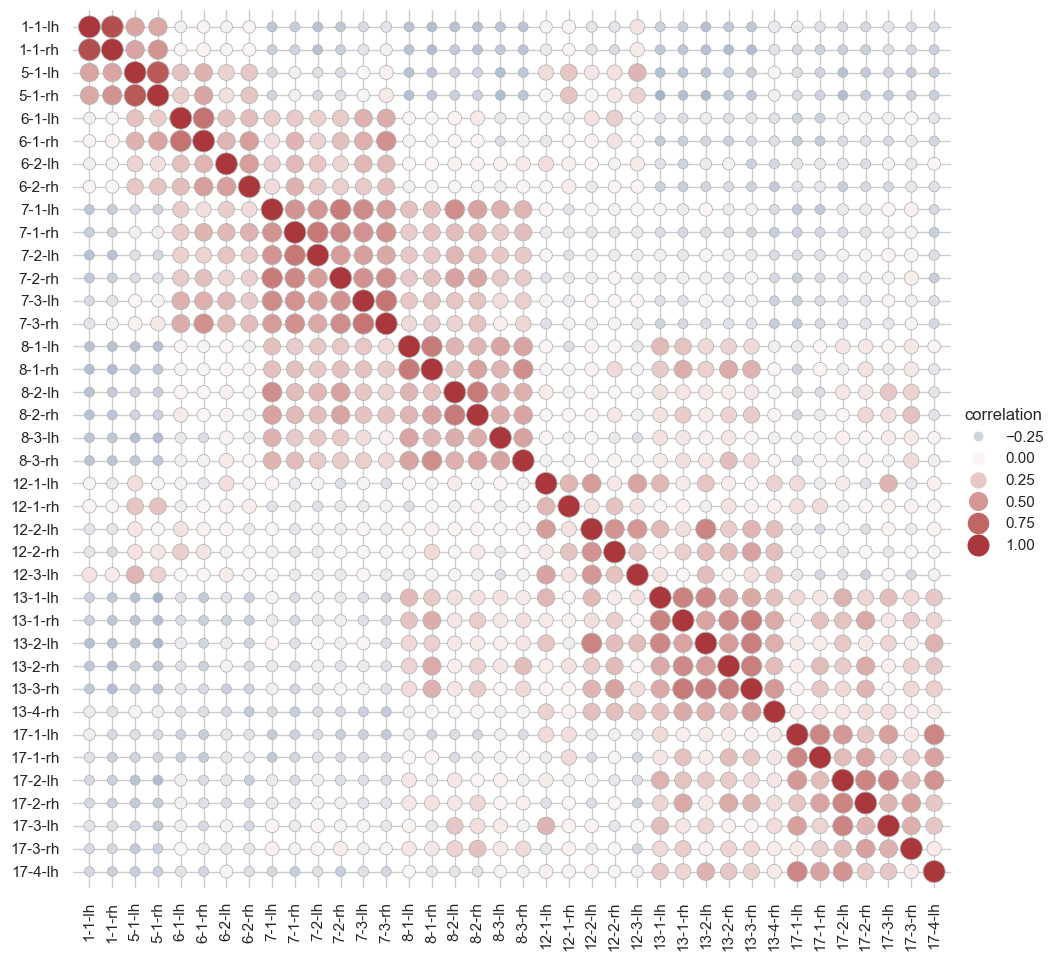

In [29]:
# Draw each cell as a scatter point with varying size and color
import seaborn as sns
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
# Tweak the figure to finalize
import matplotlib.pyplot as plt
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legend_handles:
    artist.set_markeredgecolor(".7")
    
plt.show()

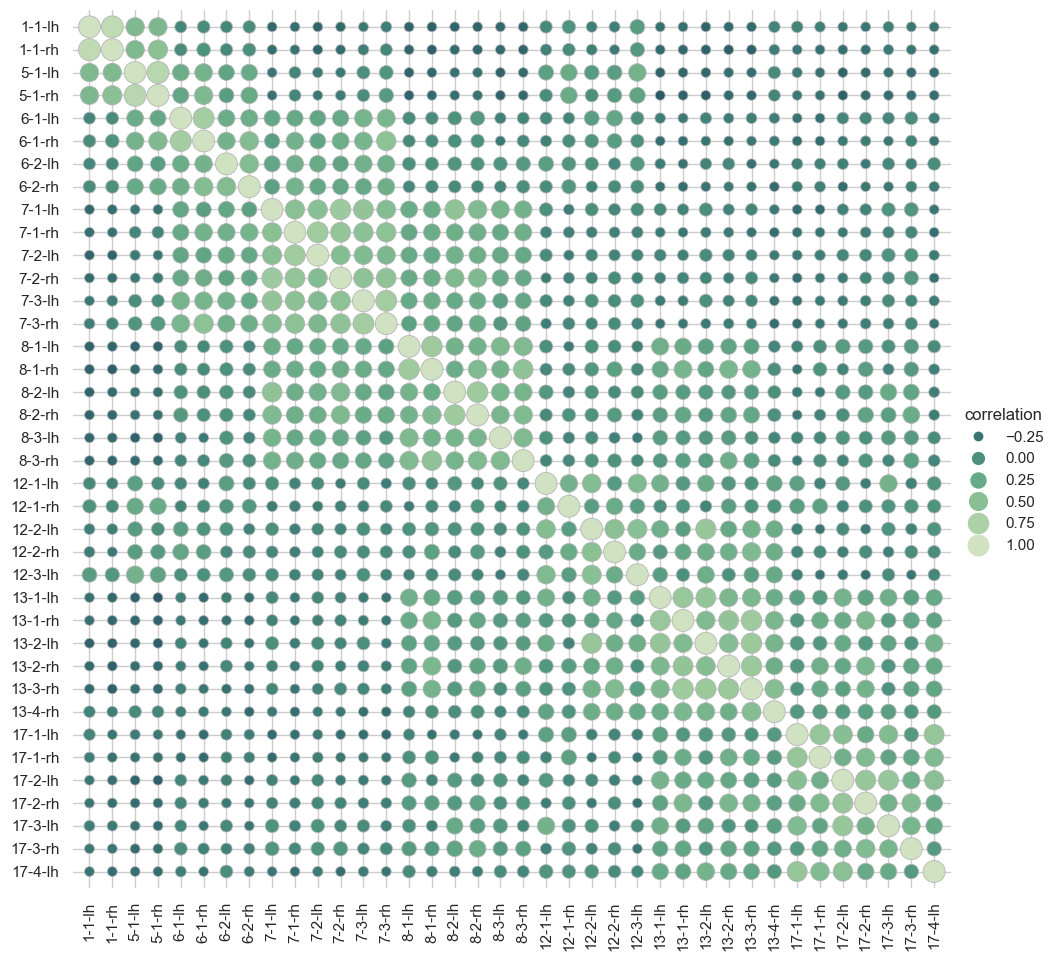

In [43]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = pd.read_csv("brain_networks.csv", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="ch:r=-.5,d=.1_r", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legend_handles:
    artist.set_markeredgecolor(".7")

plt.show()

#### 六边形热力图

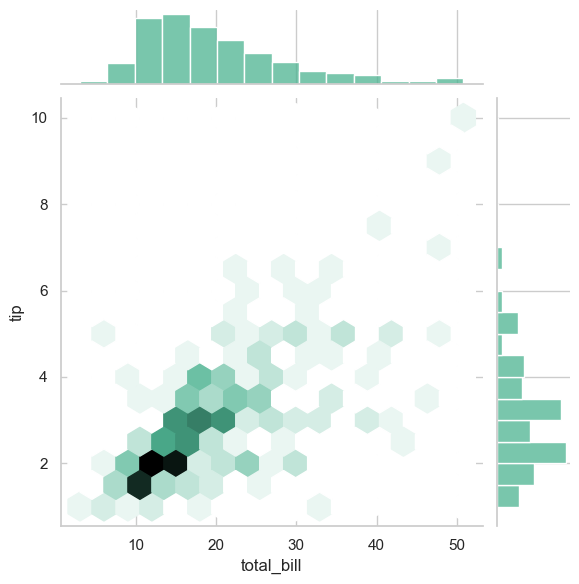

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 Seaborn 内置的 tips 数据集
tips = pd.read_csv("tips.csv")

# 绘制散点图和直方图
sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex", color="#4CB391")

# 显示图形
plt.show()

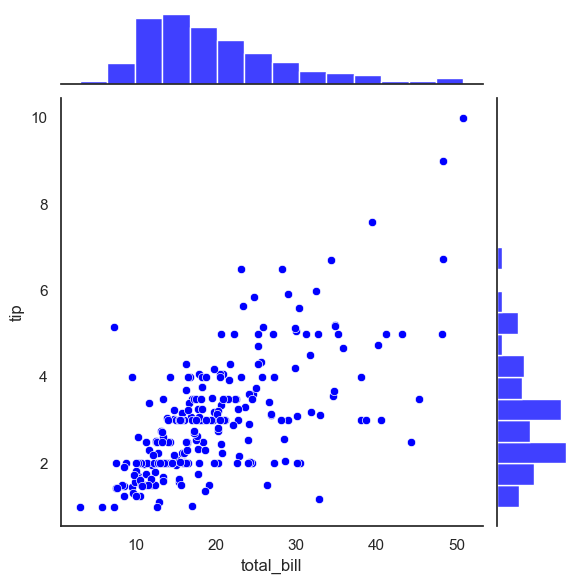

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 Seaborn 内置的 tips 数据集
tips = sns.load_dataset("tips")

# 绘制散点图和直方图
sns.jointplot(data=tips, x="total_bill", y="tip", kind="scatter", color="blue")

# 显示图形
plt.show()

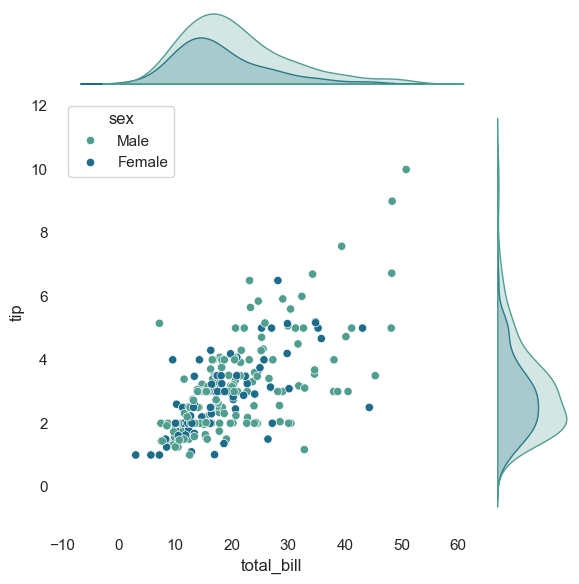

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 Seaborn 内置的 tips 数据集
tips = sns.load_dataset("tips")

# 绘制散点图和直方图
sns.set(style = 'white')
sns.jointplot(data=tips, x="total_bill", y="tip", hue='sex', kind="scatter", palette="crest")

# 显示图形
sns.despine(bottom=True,left=True)
plt.show()

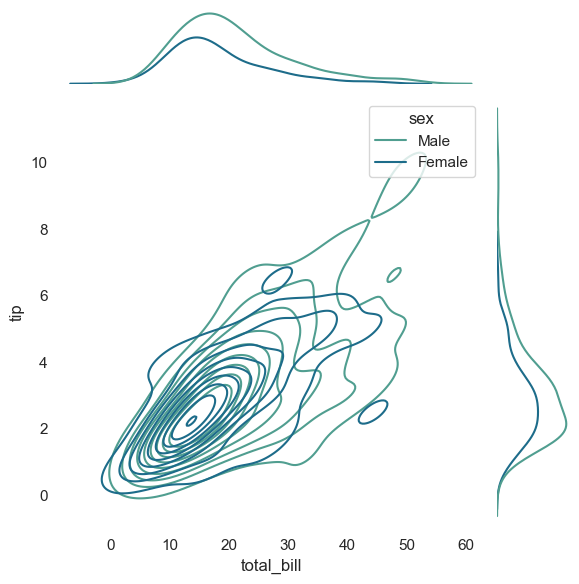

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 Seaborn 内置的 tips 数据集
tips = sns.load_dataset("tips")

# 绘制散点图和直方图
sns.set(style = 'white')
sns.jointplot(data=tips, x="total_bill", y="tip", hue='sex', kind="kde", palette="crest")

# 显示图形
sns.despine(bottom=True,left=True)
plt.show()

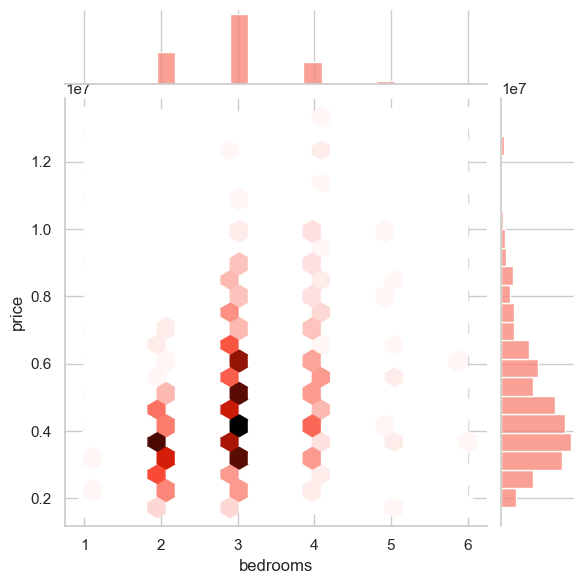

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

house_price = pd.read_csv('house_price.csv')
sns.jointplot(data = house_price,x='bedrooms',y='price',kind='hex',color='salmon')
plt.show()

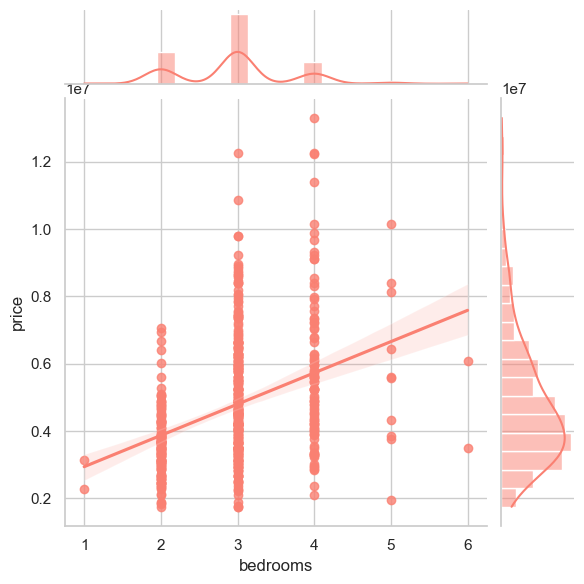

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

house_price = pd.read_csv('house_price.csv')
sns.jointplot(data = house_price,x='bedrooms',y='price',kind='reg',color='salmon')
plt.show()

#### JointGrid

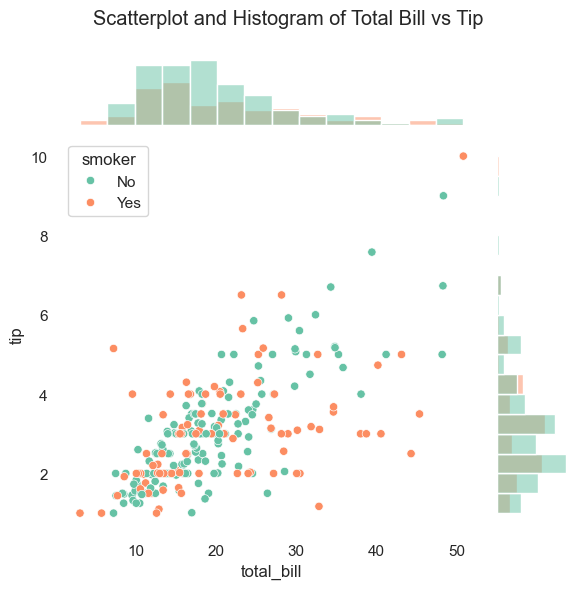

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 Seaborn 内置的 tips 数据集
tips = pd.read_csv("tips.csv")
sns.set(style = 'white',palette = 'Set2')

# 创建一个 JointGrid 对象
g = sns.JointGrid(data=tips, x="total_bill", y="tip",hue = 'smoker')

# 绘制关联散点图和边缘直方图
g.plot(sns.scatterplot, sns.histplot)

# 添加标题和注释
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Scatterplot and Histogram of Total Bill vs Tip")
sns.despine(bottom = True,left = True)

# 显示图形
plt.show()

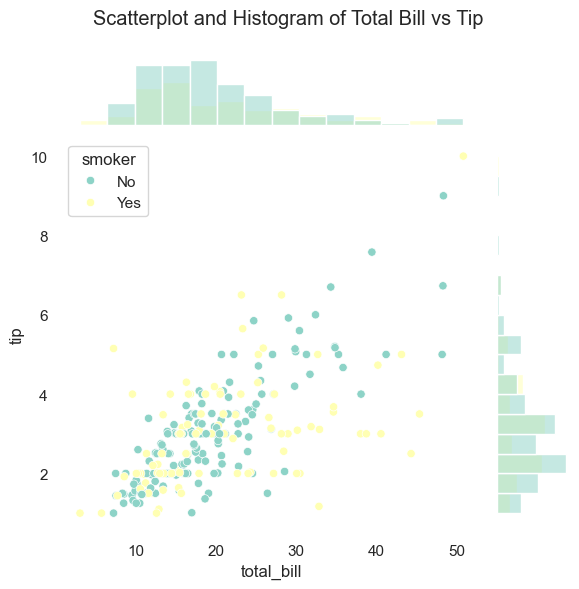

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 Seaborn 内置的 tips 数据集
tips = pd.read_csv("tips.csv")
sns.set(style = 'white',palette = 'Set3')

# 创建一个 JointGrid 对象
g = sns.JointGrid(data=tips, x="total_bill", y="tip",hue = 'smoker')

# 绘制关联散点图和边缘直方图
g.plot_joint(sns.scatterplot) 
g.plot_marginals(sns.histplot)  

# 添加标题和注释
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Scatterplot and Histogram of Total Bill vs Tip")
sns.despine(bottom = True,left = True)

# 显示图形
plt.show()

#### 散点直方图

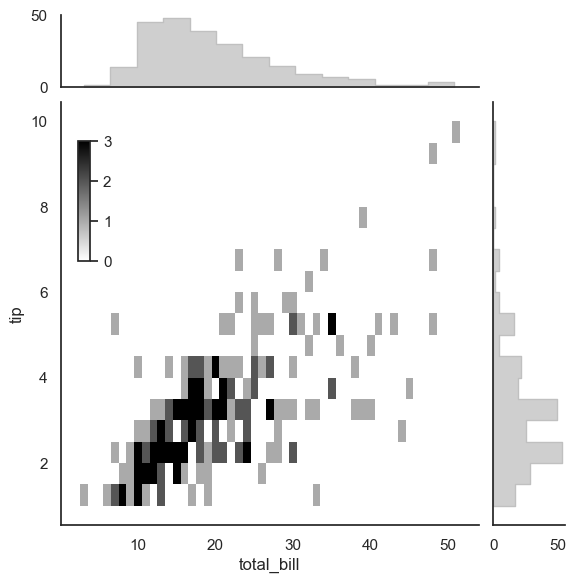

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = pd.read_csv('tips.csv')

g = sns.JointGrid(data = tips,x = 'total_bill',y = 'tip',marginal_ticks = True)
cax = g.figure.add_axes([.15, .55, .02, .2])
g.plot_joint(sns.histplot,discrete = (True,False), # 离散的散点直方
             cmap = 'binary',cbar = True,cbar_ax = cax, # 颜色映射 + 颜色条调用
             pmax = .7) # 透明度
g.plot_marginals(sns.histplot, element="step",color = 'silver')

plt.show()

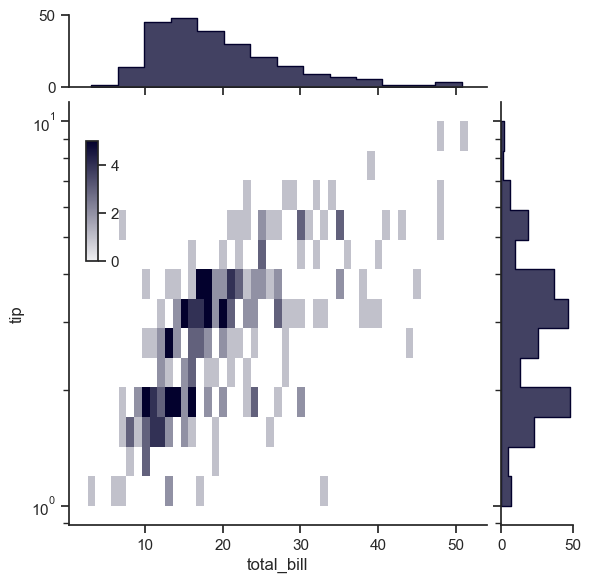

In [124]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
tips = pd.read_csv("tips.csv")
g = sns.JointGrid(data=tips,x="total_bill", y="tip", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

#### 核密度图

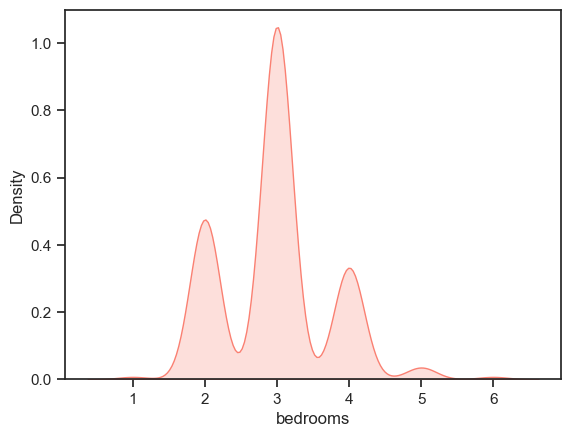

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

house_price = pd.read_csv('house_price.csv')
sns.kdeplot(data=house_price, x="bedrooms", fill=True, color="salmon")
plt.show()

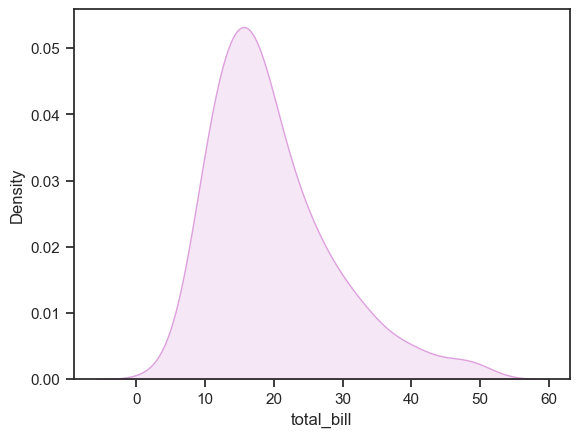

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 Seaborn 内置的 tips 数据集
tips = sns.load_dataset("tips")

# 绘制 x 轴上 "total_bill" 列的核密度估计图
sns.kdeplot(data=tips, x="total_bill", fill=True, color="plum")

# 显示图形
plt.show()

#### FaceGrid

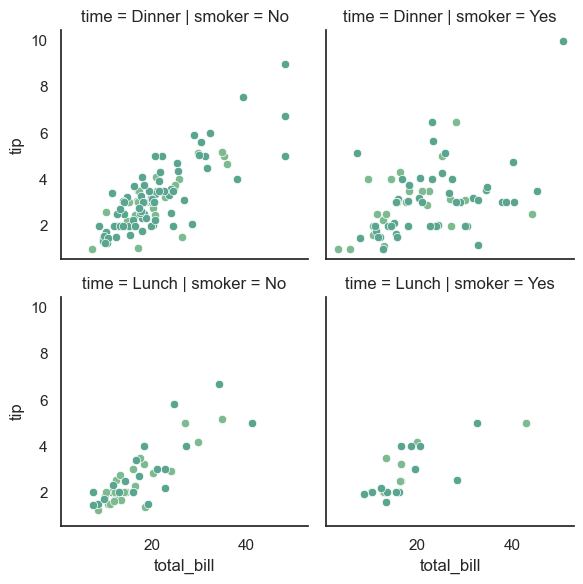

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = pd.read_csv("tips.csv")
sns.set(style = 'white',palette = 'crest')

# 初始化 FacetGrid 对象，按照 "time" 列的不同取值分成多行，并用 "sex" 列的取值作为颜色的映射
g = sns.FacetGrid(data=tips, row="time", col="smoker", hue="sex")
# row, col, hue: 指定用于分面绘图的变量。row 参数用于将数据按行分成多个面板，col 参数用于将数据按列分成多个面板，hue 参数用于将数据按颜色分组，即不同的颜色表示不同的组别。

# 在每个小图中绘制散点图，x 轴数据为 "total_bill" 列，y 轴数据为 "tip" 列
g.map(sns.scatterplot, "total_bill", "tip")

# 显示图形
plt.show()

#### 线性回归函数

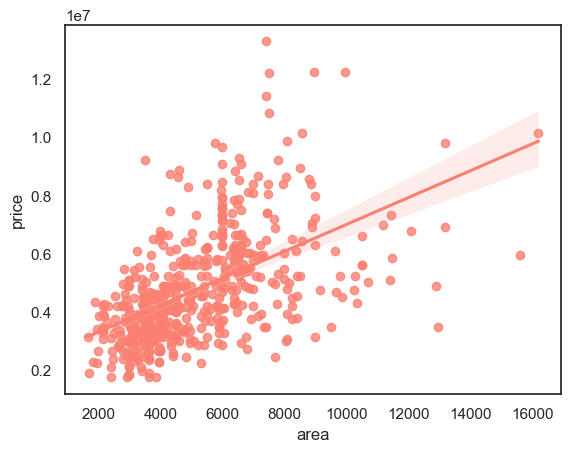

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

house_price = pd.read_csv('house_price.csv')
sns.regplot(data=house_price, x="area", y='price', color='salmon')
plt.show()

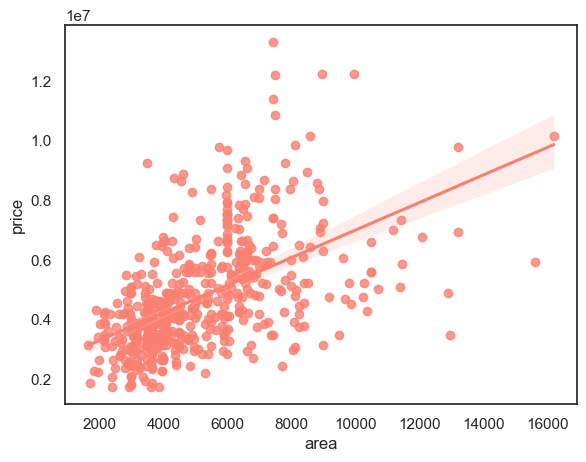

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

house_price = pd.read_csv('house_price.csv')
sns.regplot(data=house_price, x="area", y='price', color='salmon')
plt.subplots_adjust(left = 0.1,top = 0.9)
plt.show()

#### 分类图形

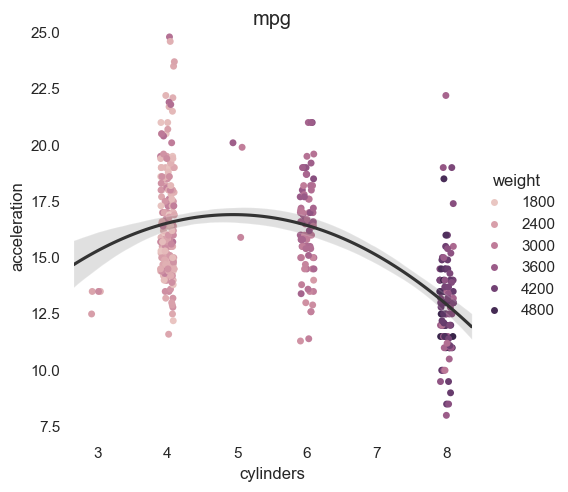

In [157]:
import seaborn as sns
sns.set_theme(style = 'white')

mpg = pd.read_csv("mpg.csv")
sns.catplot(
    data=mpg, x="cylinders", y="acceleration", hue="weight",
    native_scale=True, zorder=1
)
sns.regplot(
    data=mpg, x="cylinders", y="acceleration",
    scatter=False, truncate=False, order=2, color=".2",
)

plt.suptitle('mpg')
sns.despine(bottom = True,left = True)
plt.show()

<Axes: xlabel='cylinders', ylabel='acceleration'>

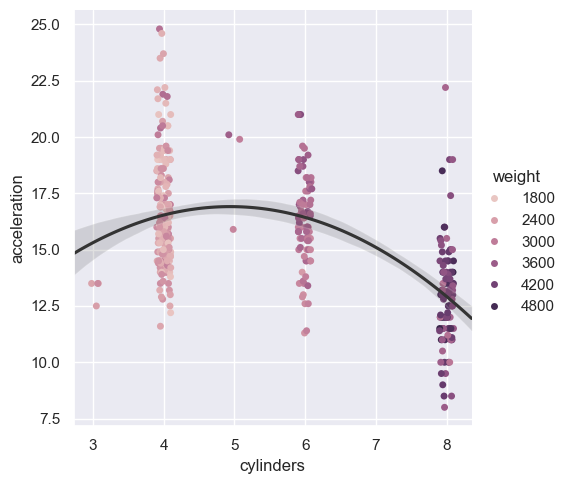

In [141]:
import seaborn as sns
sns.set_theme()

mpg = pd.read_csv("mpg.csv")
sns.catplot(
    data=mpg, x="cylinders", y="acceleration", hue="weight",
    native_scale=True, zorder=1
)
sns.regplot(
    data=mpg, x="cylinders", y="acceleration",
    scatter=False, truncate=False, order=2, color=".2",
)

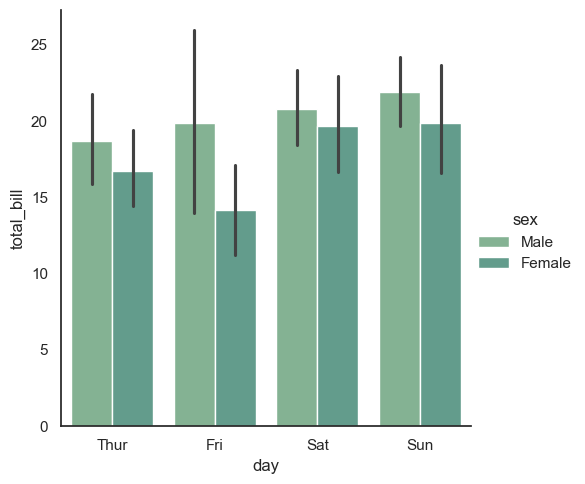

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 Seaborn 内置的 tips 数据集
tips = sns.load_dataset("tips")
sns.set_theme(style = 'white',palette = 'crest')

# 使用 catplot 绘制条形图，x 轴为 "day" 列，y 轴为 "total_bill" 列，按 "sex" 列分组
sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="bar")

# 显示图形
plt.show()


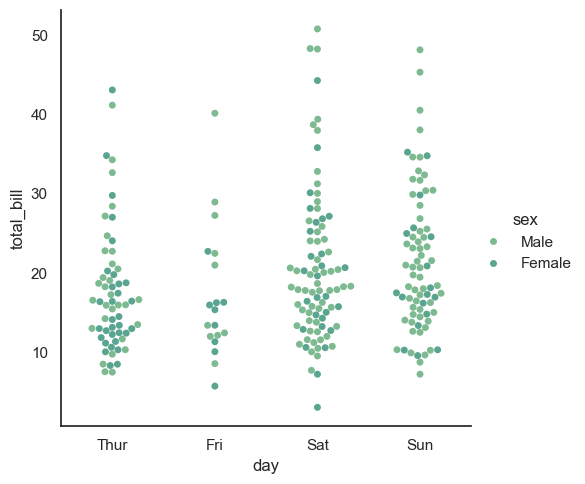

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 Seaborn 内置的 tips 数据集
tips = sns.load_dataset("tips")
sns.set_theme(style = 'white',palette = 'crest')

# 使用 catplot 绘制条形图，x 轴为 "day" 列，y 轴为 "total_bill" 列，按 "sex" 列分组
sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="swarm")

# 显示图形
plt.show()


#### 箱线图

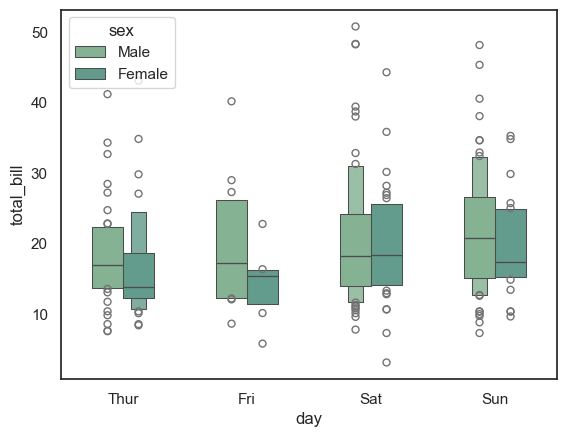

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
sns.set_theme(style = 'white',palette = 'crest')

sns.boxenplot(data=tips,x="day", y="total_bill", hue="sex", orient='v', width=0.5)
plt.show()

#### 调色板

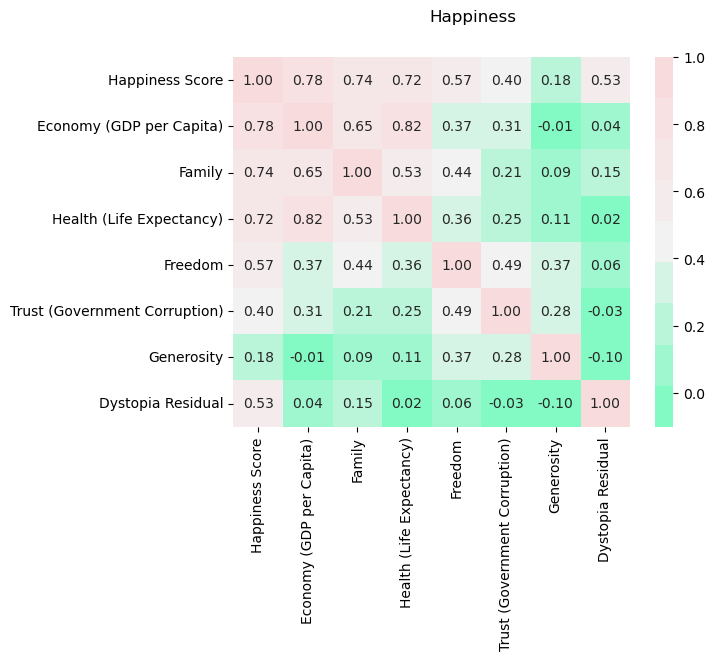

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 创建一个发散调色板
palette = sns.diverging_palette(150,10, # 颜色范围 
                                 s = 75,l = 90, # 表示色相值的饱和度和亮度，默认为 s=75 和 l=50 
                                 sep = 10, # 表示负值和正值颜色之间的色相差距，默认为 sep=10 
                                 n = 9 # 表示调色板的颜色个数 
                                )

data15 = pd.read_csv('2015.csv')
data = data15.dropna()[['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual']].corr()
sns.heatmap(data = data, annot = True, cmap = palette, fmt = '.2f') 

plt.suptitle('Happiness',fontsize = 12)
plt.show()